# 8. Differensialligninger

En diffligning er en ligning på formen

$$y^\prime(t)=f(y(t),t)$$
$$y(0)=y_0$$

der $f$ er en gitt funksjon og $y(0)=y_0$ en startbetingelse. Vi ønsker å finne $y(t)$ for alle $t$



Eksempel: $y^\prime(t)=a \cdot y(t)$ der $a\in\mathbb{R}$ sier at $y(t)$ vokser ($y^\prime(t)$) proporsjonalt med seg selv ($ax(t)$) (f.eks kroner på konto, antall individer i en populasjon av dyr/bakterier/osv). 

## Eulers metode. 
___

<img src='euler3.png' width='800px'>

“Neste $y$ er forrige $y$ pluss $h$ ganger endringsrate”. I rekkefølge beregnes $y_0$, $y_1$, $y_2$.....

Tenk deg at vi skal beregne formen på en ukjent kurve til $y(t)$ (den blå grafen over) som starter ved et gitt punkt og tilfredstiller differensialligningen  $y^\prime(t)=f(t, y(t))$. Her kan vi bruke differensialligningen som en formel for å beregne stigningtallet til tangentlinjen til kurven hvor som helst på kurven når posisjonen til det punktet er beregnet.

Tanken er at mens kurven i utgangspunktet er ukjent, er utgangspunktet $(t_0, y_0)$ kjent. Derfra kan vi bruke differensialligningen til å beregne en tilnærming til den momentane vekstfarten til y og stigningtallet til tangentlinjen.


Ta et lite steg langs tangentlinja til punktet $(t_1, y_1)$ I dette lille steget vil ikke vekstfarten til kurven endre seg så mye. Det betyr at $(t_1, y_1)$ vil være veldig nærme kurven vi ønsker å tilnærme. Slik gjentar vi prosessen. Velger vi små nok steg vil tilnærmingen være svært god.


Likning: $y^\prime(t)=f(t, y(t)), \; y(0)=y_0$

I punktet $x_k=k\cdot h$ tilnærmer vi 

$y^\prime = \frac{y_{k+1}-y_k}{h}$


og setter inn i likningen og løser den med hensyn på $y_{k+1}$

\begin{align}
\frac{y_{k+1}-y_k}{h} & = f(t_k, y_k)\\
y_{k+1}-y_k & = h\cdot f(t_k, y_k)\\
y_{k+1} & = y_k + h\cdot f(t_k, y_k)\\
\end{align}
___

<a href='https://www.geogebra.org/m/q9csTDeZ'>GeoGebra</a>

### Praktiske forsøk og simuleringer med difflikninger

#### Bil opp skråplan

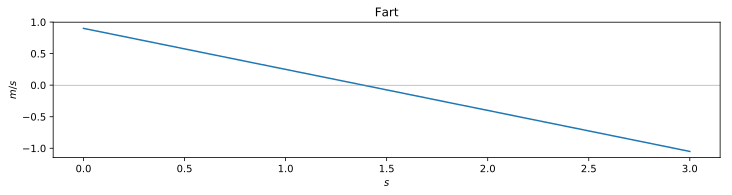

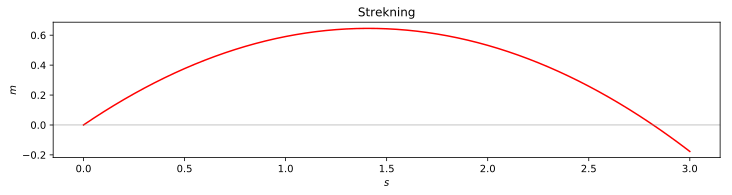

In [188]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Fysiske størrelser
g = -9.81              #Tyngdeakselerasjon i m/s/s
α = np.radians(3.8)    #Vinkel til skråplan i radianer
a = g*np.sin(α)        #Akselerasjonen som virker på bilen. (endringen i fart)

v_0 = 0.9              #Startfart i m/s
s_0 = 0                #Startstrekning m

#Tidsintervaller
T = 3                  #Tid i s
h = 0.05               #Steglengde
N = round(T/h)         #Antall steg

t = np.linspace(0, T, N+1) #Tidsarray
v = np.zeros(N+1)          #Fartsarray med nuller (skal fylles ved hjelp av eulers metode)
s = np.zeros(N+1)          #Strekningsarray med nuller

v[0] = v_0
s[0] = s_0

#Eulers metode
for k in range(N):
    v[k+1] = v[k] + h*a     
    s[k+1] = s[k] + h*v[k]

plt.rcParams['figure.figsize'] = (12, 2.5)
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, 'r')
plt.axhline(0, color='gray', lw=0.5)
plt.show()

In [189]:
import pandas as pd
bil = pd.read_csv('bil.txt', sep='\t', decimal=",")
bil.Position = bil.Position - 0.47

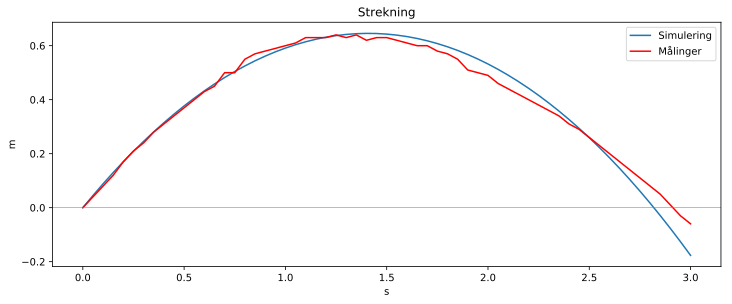

In [190]:
plt.rcParams['figure.figsize'] = (12, 4.5)
plt.xlabel('s') # Merker x-aksen
plt.ylabel('m') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, label='Simulering')
plt.plot(t, bil.Position, 'r' , label='Målinger')
plt.legend()
plt.axhline(0, color='gray', lw=0.5)
plt.show()

# Populasjonsmodeller

Noen eksempler på faktorer vi må ta hensyn til når vi skal studere en populasjon:

* Hvilket samspill har arten med andre arter?
* Hvilken tilgang har populasjonen på mat og andre nødvendige ressurser?
* Hvor stor plass har populasjonen til å utvide seg?
* Hvilke abiotiske (ikke-levende) faktorer påvirker populasjonen? Dette kan f.eks. være årstider, lys- og vindforhold, luftfuktighet, næringssalter osv.
* Hvilke sykdommer og parasitter finnes i økosystemet?


### En enkel modell for kaniner kan være:

$K^{\prime}(t) = aK(t)$

Endringen i populasjonen er avhengig av hvor mange kaniner det er til en hver tid.

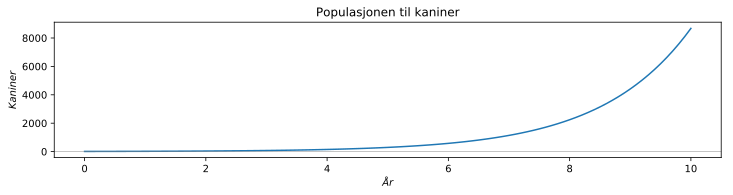

101


In [196]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelser
K_0 = 10     # Antall kaninger ved tid 0
a   =     # Formeringsfaktor

#Tidssteg
T = 10                     # tidsperiode i år
h = 0.1                    # steglengde
N = round(T/h)             # antall steg

t = np.linspace(0, T, N+1) # tidsarray
K = np.zeros(N+1)

K[0] = K_0

for k in range(N):
    K[k+1] = K[k] + h*a*K[k]
    
plt.rcParams['figure.figsize'] = (12, 2.5)
plt.xlabel('$År$') # Merker x-aksen
plt.ylabel('$Kaniner$') # Merker y-aksen
plt.title('Populasjonen til kaniner') #Tittel
plt.plot(t, K)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

print(len(K))

### Utvidet modell 

Hvis vi vil, kan vi lett legge inn en annen modell, som baserer seg på at vi har en bæreevne på grunn av begrenset tilgang på f.eks. plass eller ressurser. Bæreevnen b er antallet individer som økosystemet stabiliserer seg rundt på grunn av dette. Modellen ser da slik ut:

$$K^{\prime}(t) = aK(t)\left(1-\frac{K(t)}{b}\right)$$

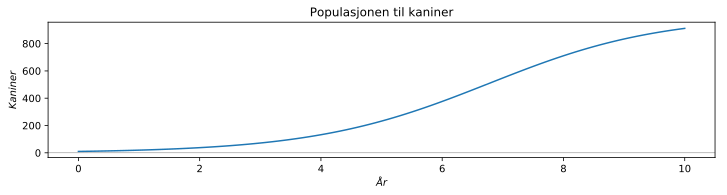

101


In [250]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelser
K_0 = 10     # Antall kaninger ved tid 0
a   = 0.7    # Formeringsrateb
b   = 1000   # Bæreevne

#Tidssteg
T = 10                     # tidsperiode i år
h = 0.1                    # steglengde
N = round(T/h)             # antall steg

t = np.linspace(0, T, N+1) # tidsarray
K = np.zeros(N+1)

K[0] = K_0

for k in range(N):
    K[k+1] = K[k] + h*a*K[k]*(1-K[k]/b)
    
plt.rcParams['figure.figsize'] = (12, 2.5)
plt.xlabel('$År$') # Merker x-aksen
plt.ylabel('$Kaniner$') # Merker y-aksen
plt.title('Populasjonen til kaniner') #Tittel
plt.plot(t, K)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

print(len(K))

### Utvidet modell 2

**Hva om vi legger til en revepopulasjon i modellen?**

$$K’(t) = aK(t)\left(1-\frac{K(t)}{b}\right) - cK(t)R(t)$$


$$R’(t) = dK(t)R(t) - eR(t)$$

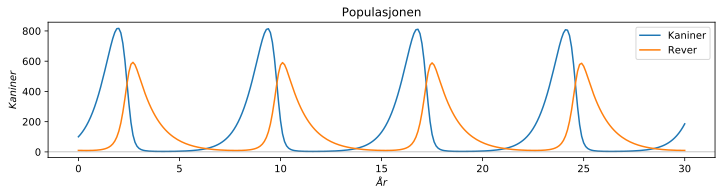

In [327]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Initialbetingelser
K_0 = 100    # Antall kaninger ved tid 0
R_0 = 10
a   = 1.7     # Formeringsrate kanin
b   = 2000    # Bæreevne kanin
c   = 0.01    # Drapsrate
d   = 0.006   # Formeringsrate rev
e   = 0.95    # Dødsrate rev

#Tidssteg
T = 30                     # tidsperiode i år
h = 0.1                    # steglengde
N = round(T/h)             # antall steg

t = np.linspace(0, T, N+1) # tidsarray
K = np.zeros(N+1)
R = np.zeros(N+1)

K[0] = K_0
R[0] = R_0

for k in range(N):
    K[k+1] = K[k] + h*(a*K[k]*(1-K[k]/b) - c*K[k]*R[k])
    R[k+1] = R[k] + h*(d*K[k]*R[k] - e*R[k])
    
plt.rcParams['figure.figsize'] = (12, 2.5)
plt.xlabel('$År$') # Merker x-aksen
plt.ylabel('$Kaniner$') # Merker y-aksen
plt.title('Populasjonen') #Tittel
plt.plot(t, K, label='Kaniner')
plt.plot(t, R, label='Rever')
plt.legend();
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#interact(f, x=10);

# Ballong i fritt fall

\begin{align}
    ma & = mg-cv^2\\
    a & = g - \frac{cv^2}{m}
\end{align}
$$$$

18


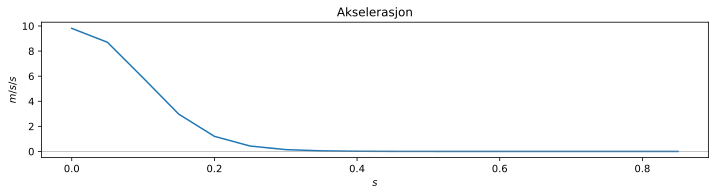

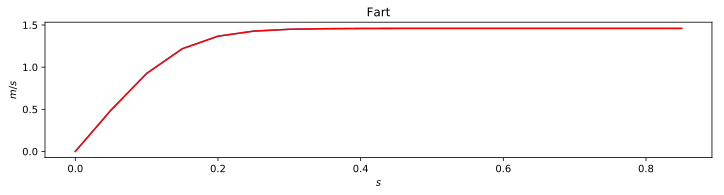

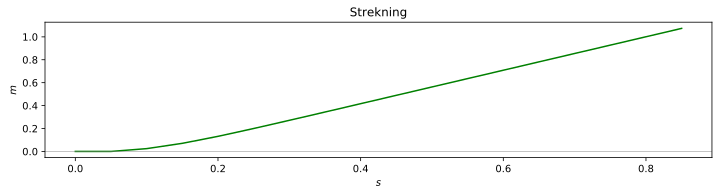

In [164]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Fysiske størrelser
g = 9.81                      #tyngdeakselerasjon i m/s/s
m = 0.00326                       #masse til gjenstand som faller i kg
v_0 = 0                       #Startfart i m/s
s_0 = 0                       #Startstrekning i m
c = 0.015                       #luftmotstandkoefesient 
                              #konstant som er avhengig av formen og tversnittet til muffinsformen
                              #og lutfa sin tetthet
        
#Tidsintervaller
T = 0.85                         #antall sekunder
h = 0.05                  #Steglengde
N = round(T/h)                #Antall intervaller. Tid delt på steglengde. 
t = np.linspace(0, T, N+1)    #Tidsarray
a = np.zeros(N+1)             #Akselerasjonsarray
v = np.zeros(N+1)             #Fartsarray
s = np.zeros(N+1)             #Strekningsarray


# Legger startverdiene til arrayene
v[0] = v_0 
v[0] = s_0 

# Eulers metode
for k in range(N):
    a[k]   = g - (c*v[k]**2)/m
    v[k+1] = v[k] + h*a[k]
    s[k+1] = s[k] + h*v[k]
    
print(len(t))

plt.rcParams['figure.figsize'] = (12, 2.5)
plt.rcParams.update({'font.size': 10})

#Akselerasjonsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s/s$') # Merker y-aksen
plt.title('Akselerasjon') #Tittel
plt.plot(t, a)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#Fartssplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v)
plt.plot(t, v, 'r')
plt.show()

#Strekningsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, 'g')
plt.axhline(0, color='gray', lw=0.5)
plt.show()

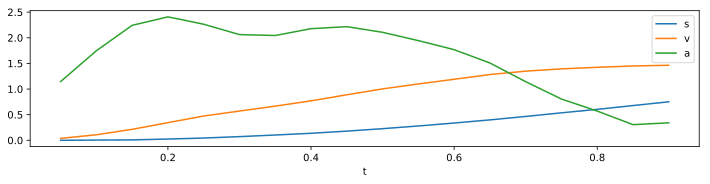

In [165]:
import pandas as pd
ballong = pd.read_csv('Ballong.txt', sep='\t', decimal=",")

ballong.t -= 0.15
ballong.s -= 0.6736 + 0.7511
ballong.s *= -1
ballong.v *= -1
ballong.a *= -1
ballong.plot(x='t')
plt.show()

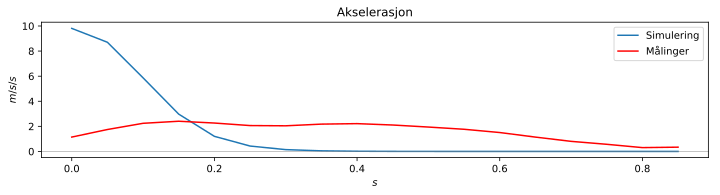

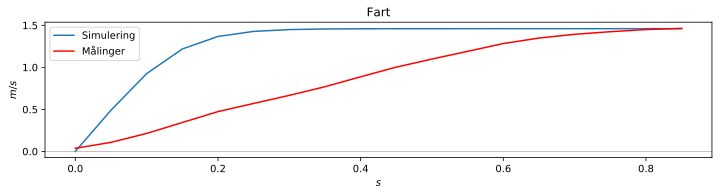

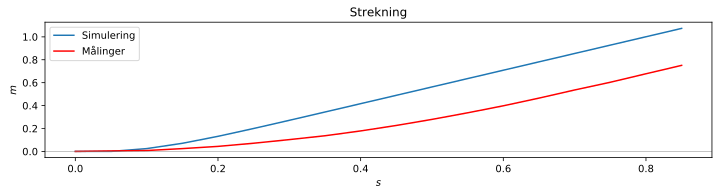

In [166]:
#Akselerasjonsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s/s$') # Merker y-aksen
plt.title('Akselerasjon') #Tittel
plt.plot(t, a, label='Simulering')
plt.plot(t, ballong.a, 'r', label='Målinger')
plt.legend()
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#Fartssplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v, label='Simulering')
plt.plot(t, ballong.v, 'r', label='Målinger')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.show()

#Strekningsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, label='Simulering')
plt.plot(t, ballong.s, 'r', label='Målinger')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.show()

# Muffins

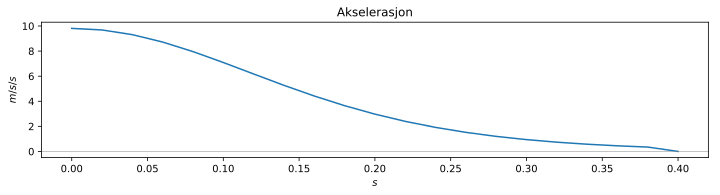

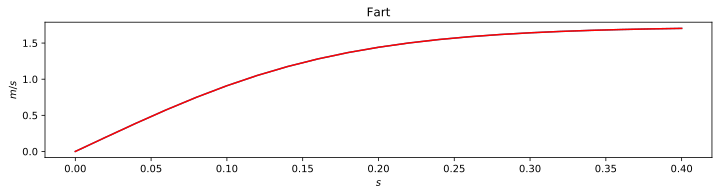

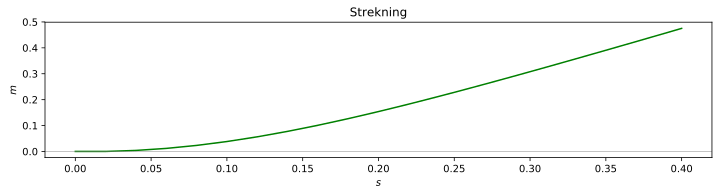

In [167]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Fysiske størrelser
g = 9.81                      #tyngdeakselerasjon i m/s/s
m = 0.00152                   #masse til gjenstand som faller i kg
v_0 = 0                       #Startfart i m/s
s_0 = 0                       #Startstrekning i m
c = 0.005                     #luftmotstandkoefesient 
                              #konstant som er avhengig av formen og tversnittet til muffinsformen
                              #og lutfa sin tetthet
        
#Tidsintervaller
T = 0.40                      #antall sekunder
h = 0.02                      #Steglengde
N = round(T/h)                #Antall intervaller. Tid delt på steglengde. 
t = np.linspace(0, T, N+1)    #Tidsarray
a = np.zeros(N+1)             #Akselerasjonsarray
v = np.zeros(N+1)             #Fartsarray
s = np.zeros(N+1)             #Strekningsarray


# Legger startverdiene til arrayene
v[0] = v_0 
v[0] = s_0 

# Eulers metode
for k in range(N):
    a[k]   = g - (c*v[k]**2)/m
    v[k+1] = v[k] + h*a[k]
    s[k+1] = s[k] + h*v[k]

plt.rcParams['figure.figsize'] = (12, 2.5)
plt.rcParams.update({'font.size': 10})

#Akselerasjonsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s/s$') # Merker y-aksen
plt.title('Akselerasjon') #Tittel
plt.plot(t, a)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#Fartssplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v)
plt.plot(t, v, 'r')
plt.show()

#Strekningsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, 'g')
plt.axhline(0, color='gray', lw=0.5)
plt.show()

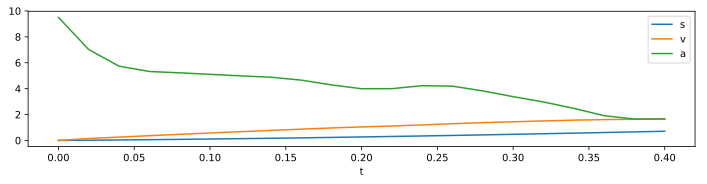

In [168]:
import pandas as pd
muffins = pd.read_csv('Muffinsform.txt', sep='\t', decimal=",")

muffins.t -= 2.7400
muffins.s -= 1.0725
muffins.v += 0.7823
muffins.s *= -1
muffins.v *= -1
muffins.a *= -1
muffins.plot(x='t')
plt.show()

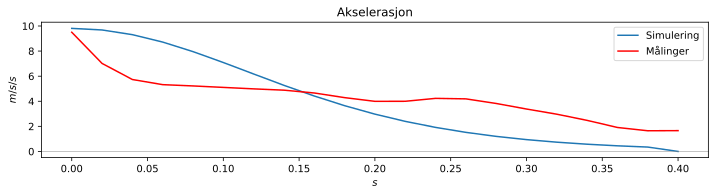

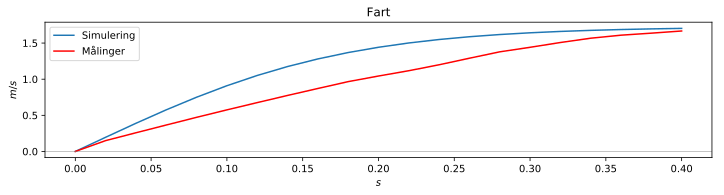

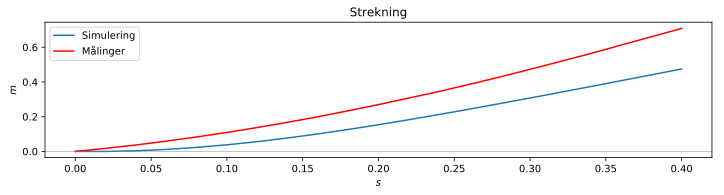

In [169]:
#Akselerasjonsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s/s$') # Merker y-aksen
plt.title('Akselerasjon') #Tittel
plt.plot(t, a, label='Simulering')
plt.plot(t, muffins.a, 'r', label='Målinger')
plt.legend()
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#Fartssplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v, label='Simulering')
plt.plot(t, muffins.v, 'r', label='Målinger')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.show()

#Strekningsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, label='Simulering')
plt.plot(t, muffins.s, 'r', label='Målinger')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.show()

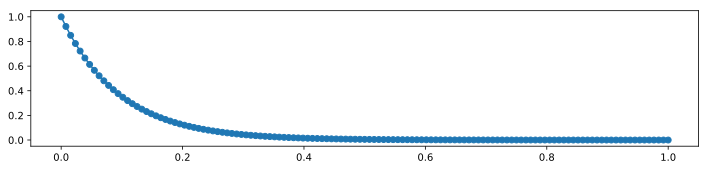

In [58]:
### import numpy as np
import matplotlib.pyplot as plt
a = -10
x_0 = 1
h = 2**(-7)
T = 1
N = round(T/h)
t = np.linspace(0, T, N+1)
x = np.zeros(N+1)
x[0] = x_0

for k in range(N):
    x[k+1] = x[k] + h*a*x[k]
    
plt.plot(t, x, '-o')

## Eksemplene fra boka

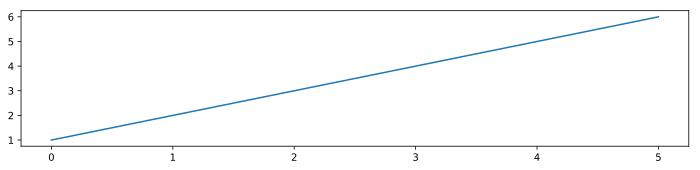

In [170]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, k):
    return 1    

y_0 = 0 #startbetingelse (x(a)=x_0)  
h = 2**(-7) #steglengde
T = 5 # tid etter start a
N = round(T/h) #Tid delt på steglengde
t = np.linspace(0, T, N+1)
y = np.zeros(N+1)

# Fyller arrayet med funskjonsverdier
y[0] = x_0 
for k in range(N):
    y[k+1] = y[k] + h*f(y[k],k)
    
plt.plot(t, y)
plt.show()

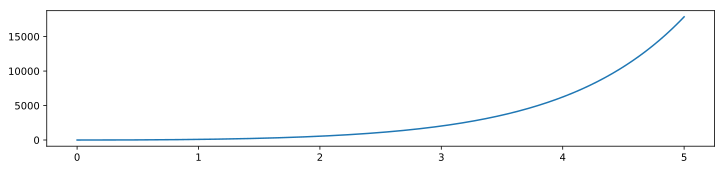

In [171]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, k):
    return x + k   

y_0 = 0 #startbetingelse (x(a)=x_0)  
h = 2**(-7) #steglengde
T = 5 # tid etter start a
N = round(T/h) #Tid delt på steglengde
t = np.linspace(0, T, N+1)
y = np.zeros(N+1)

# Fyller arrayet med funskjonsverdier
y[0] = y_0 
for k in range(N):
    y[k+1] = y[k] + h*f(y[k],k)
    
plt.plot(t, y)